Contrast   : 113.3450
Homogeneity: 0.4234
Energy     : 0.0457
Correlation: 0.9742


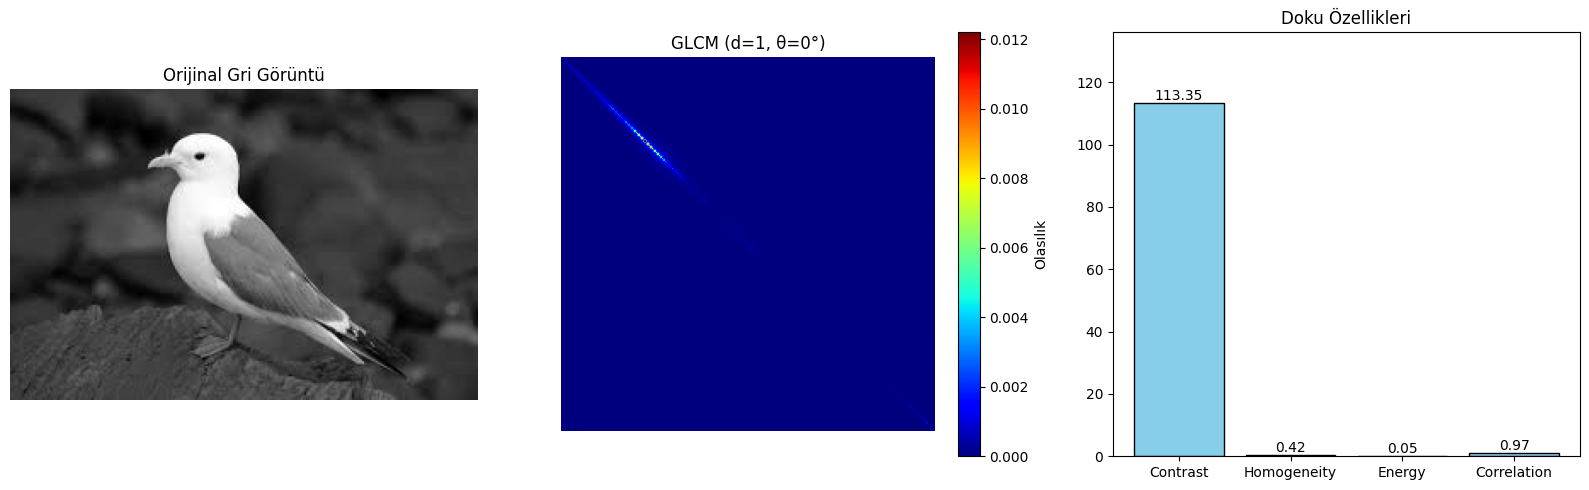

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

#-------------------------------
# 1. Görüntüyü Gri Tonlamaya Çevir
#-------------------------------
image = cv2.imread('Red_legged_Kittiwake.jpeg', cv2.IMREAD_GRAYSCALE)

# Gri seviye sayısını sınırlamak (isteğe bağlı, örneğin: 8-bit = 256)
levels = 256

#-------------------------------
# 2. GLCM Hesaplama
#-------------------------------
# Mesafe = 1 piksel, Açı = 0 derece (yatay yönde)
glcm = graycomatrix(
    image,
    distances=[1],
    angles=[0],
    levels=levels,
    symmetric=True,
    normed=True
)

#-------------------------------
# 3. Doku Özelliklerini Hesaplama
#-------------------------------
contrast = graycoprops(glcm, 'contrast')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]

# Konsola yazdır
print(f"Contrast   : {contrast:.4f}")
print(f"Homogeneity: {homogeneity:.4f}")
print(f"Energy     : {energy:.4f}")
print(f"Correlation: {correlation:.4f}")

#-------------------------------
# 4. Görselleştirme
#-------------------------------
plt.figure(figsize=(16, 5))

# Orijinal görüntü
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Orijinal Gri Görüntü')
plt.axis('off')

# GLCM matrisi (0° açı, 1 piksel mesafe)
plt.subplot(1, 3, 2)
plt.imshow(glcm[:, :, 0, 0], cmap='jet', interpolation='nearest')
plt.title('GLCM (d=1, θ=0°)')
plt.colorbar(label='Olasılık')
plt.axis('off')

# Doku özellikleri çubuğu
plt.subplot(1, 3, 3)
properties = ['Contrast', 'Homogeneity', 'Energy', 'Correlation']
values = [contrast, homogeneity, energy, correlation]
bars = plt.bar(properties, values, color='skyblue', edgecolor='black')
plt.title('Doku Özellikleri')
plt.ylim(0, max(values) * 1.2)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Contrast   : 113.3450
Homogeneity: 0.4234


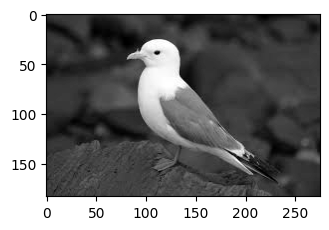

In [24]:
from skimage.feature import graycomatrix, graycoprops

glcm = graycomatrix(image, distances=[1, 2], angles=[0, np.pi/2], levels=256, symmetric=True, normed=True)
contrast = graycoprops(glcm, 'contrast')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

print(f"Contrast   : {contrast:.4f}")
print(f"Homogeneity: {homogeneity:.4f}")

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')


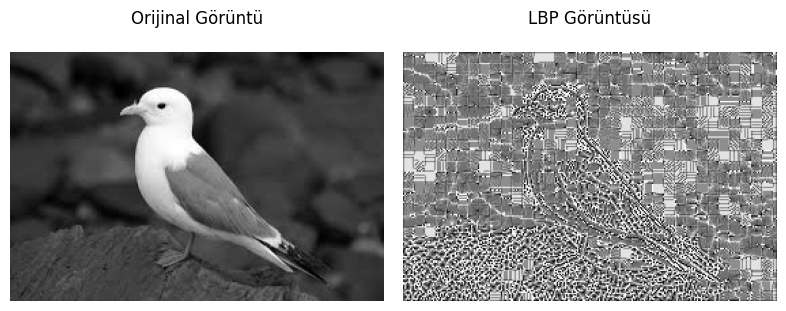

LBP Histogramı:
 [0.02416294 0.03948336 0.02831595 0.11998013 0.23346249 0.24854446
 0.07560854 0.05973174 0.10801788 0.0626925 ]


In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# 1. Görüntüyü yükle ve gri tona çevir
image = cv2.imread('Red_legged_Kittiwake.jpeg', cv2.IMREAD_GRAYSCALE)

# 2. LBP parametrelerini tanımla
radius = 1              # Komşuluk yarıçapı
n_points = 8 * radius   # Komşu piksel sayısı (8, 16, 24...)
method = 'uniform'      # 'default', 'ror', 'uniform', 'nri_uniform'

# 3. LBP özelliğini çıkar
lbp = local_binary_pattern(image, n_points, radius, method)

# 4. Histogram hesapla (LBP dağılımı)
n_bins = int(lbp.max() + 1)
hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins), density=True)

# 5. Sonuçları görselleştir
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title("Orijinal Görüntü\n")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title("LBP Görüntüsü\n")
plt.imshow(lbp, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

# Histogramı yazdır
print("LBP Histogramı:\n", hist)

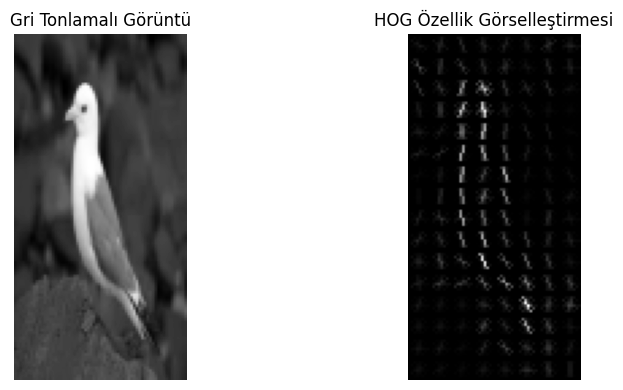

In [47]:
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.feature import hog
from skimage.transform import resize

# Görüntüyü yükle ve yeniden boyutlandır (isteğe bağlı)
image = io.imread('Red_legged_Kittiwake.jpeg')  # kendi görselini buraya koy
image_resized = resize(image, (128, 64))  # HOG için yaygın boyut

# Gri tonlamaya çevir
gray_image = color.rgb2gray(image_resized)

# HOG özelliklerini ve görselleştirmesini elde et
features, hog_image = hog(
    gray_image,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=True
)

# Görselleştirme
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)
ax1.imshow(gray_image, cmap='gray')
ax1.set_title('Gri Tonlamalı Görüntü')
ax1.axis('off')

ax2.imshow(hog_image, cmap='gray')
ax2.set_title('HOG Özellik Görselleştirmesi')
ax2.axis('off')

plt.show()

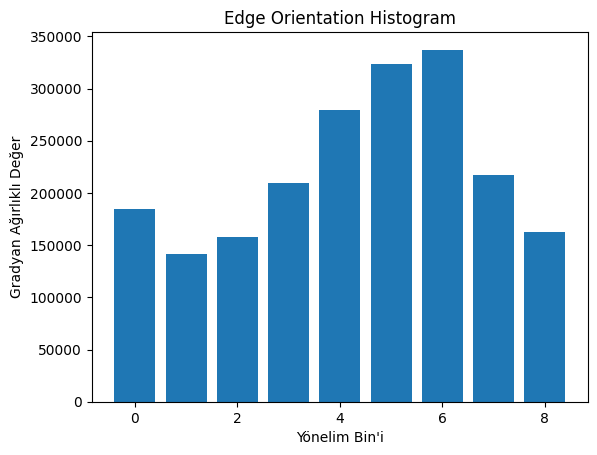

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü oku ve griye çevir
image = cv2.imread('Red_legged_Kittiwake.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sobel filtreleri ile gradyanları hesapla
Gx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Büyüklük ve yön
magnitude = np.sqrt(Gx**2 + Gy**2)
angle = np.arctan2(Gy, Gx) * 180 / np.pi
angle = np.mod(angle, 180)  # 0-180 dereceye normalize

# Yönelime göre histogram
num_bins = 9
bin_edges = np.linspace(0, 180, num_bins + 1)
hist, _ = np.histogram(angle, bins=bin_edges, weights=magnitude)

# Histogramı görselleştir
plt.bar(range(num_bins), hist)
plt.xlabel("Yönelim Bin'i")
plt.ylabel("Gradyan Ağırlıklı Değer")
plt.title("Edge Orientation Histogram")
plt.show()


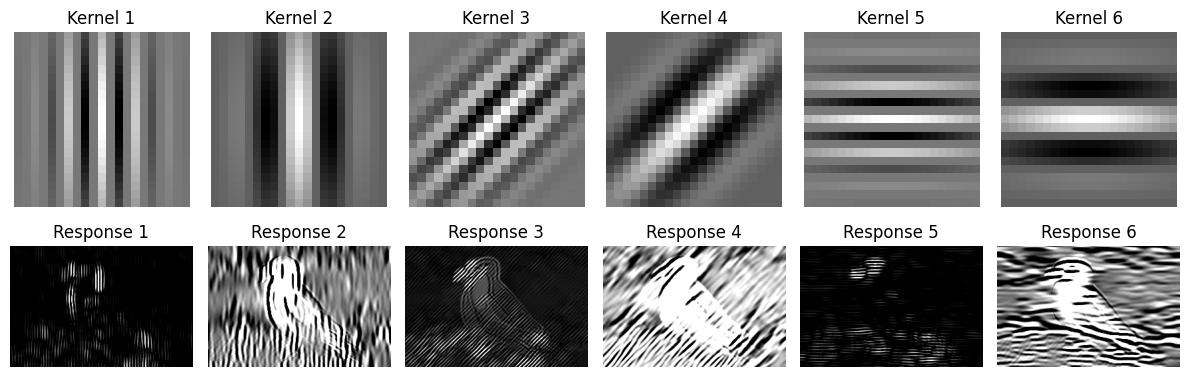

Özellik vektörü boyutu: 192


In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü gri tonlamalı oku
img = cv2.imread('Red_legged_Kittiwake.jpeg', 0)

# Gabor filtrelerini oluştur
def gabor_filter_bank(frequencies, orientations):
    filters = []
    for theta in orientations:
        for f in frequencies:
            kernel = cv2.getGaborKernel((21, 21), 4.0, theta, f, 0.5, 0, ktype=cv2.CV_32F)
            filters.append(kernel)
    return filters

# Parametreler
frequencies = [4, 8]
orientations = [0, np.pi/4, np.pi/2]
filters = gabor_filter_bank(frequencies, orientations)

# Filtreleri uygula
responses = [cv2.filter2D(img, cv2.CV_8UC3, k) for k in filters]

# Görselleri göster
plt.figure(figsize=(12, 6))
for i, (filt, resp) in enumerate(zip(filters, responses)):
    plt.subplot(3, len(filters), i + 1)
    plt.imshow(filt, cmap='gray')
    plt.title(f'Kernel {i+1}')
    plt.axis('off')

    plt.subplot(3, len(filters), i + 1 + len(filters))
    plt.imshow(resp, cmap='gray')
    plt.title(f'Response {i+1}')
    plt.axis('off')

# Histogramdan öznitelik vektörü çıkarımı
feature_vector = []
for resp in responses:
    hist = cv2.calcHist([resp], [0], None, [32], [0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    feature_vector.extend(hist)

plt.tight_layout()
plt.show()
print("Özellik vektörü boyutu:", len(feature_vector))


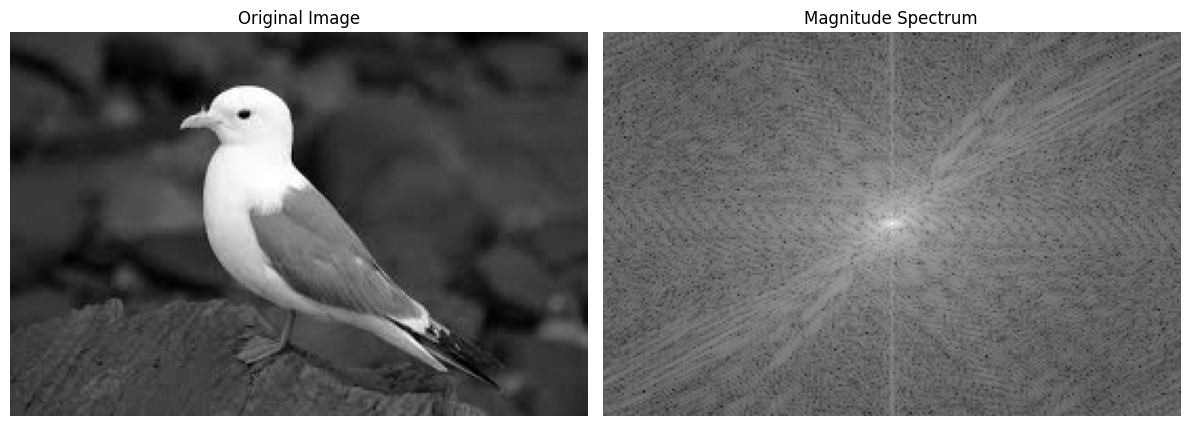

[ WARN:0@344419.962] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


True

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü gri tonlamalı oku
img = cv2.imread('Red_legged_Kittiwake.jpeg', 0)

# Fourier dönüşümü
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # +1 log(0) hatasını önler

# Görselleştir
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()

# Kaydetme (opsiyonel)
cv2.imwrite('Red_legged_KittiwakeF.jpeg', magnitude_spectrum)


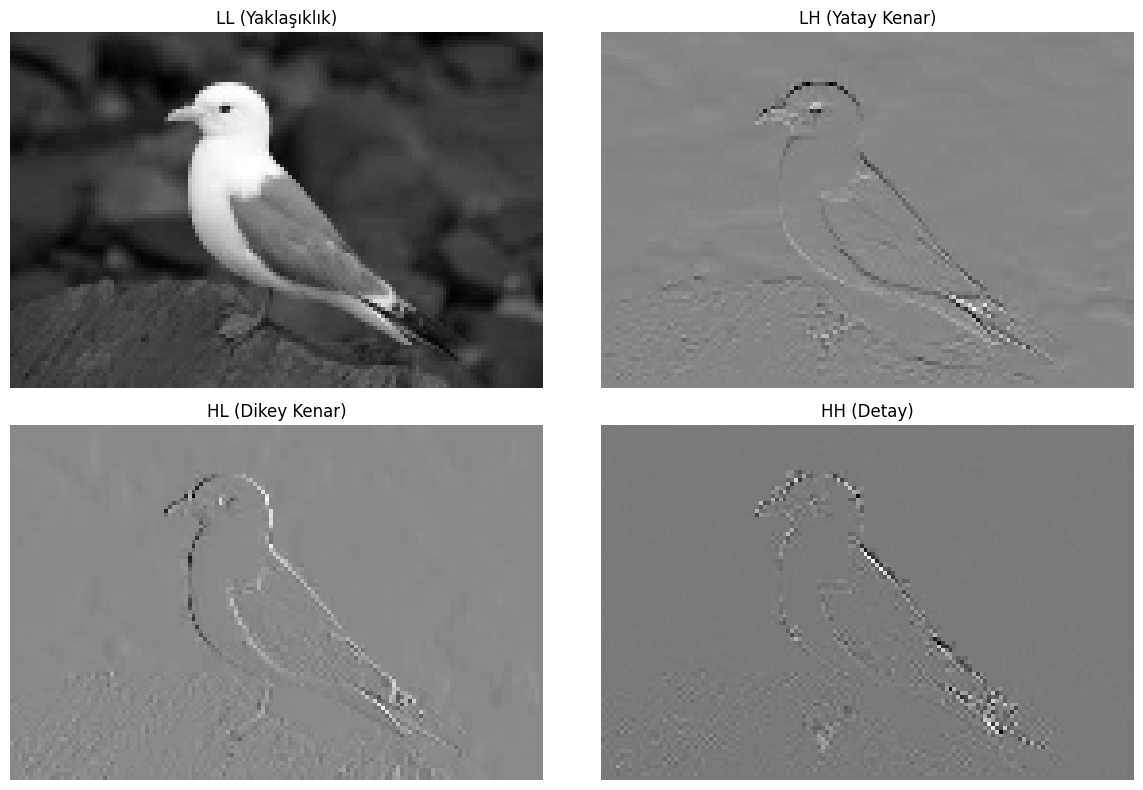

Öznitelik vektörü uzunluğu: 128


In [55]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Red_legged_Kittiwake.jpeg', cv2.IMREAD_GRAYSCALE)

# 2. Tek seviye 2D ayrık wavelet dönüşümü (Daubechies 1)
coeffs2 = pywt.dwt2(img, 'db1')
LL, (LH, HL, HH) = coeffs2

# 3. Alt bantları görselleştir
plt.figure(figsize=(12, 8))
bands = [LL, LH, HL, HH]
titles = ['LL (Yaklaşıklık)', 'LH (Yatay Kenar)', 'HL (Dikey Kenar)', 'HH (Detay)']

for i, (band, title) in enumerate(zip(bands, titles)):
    plt.subplot(2, 2, i+1)
    plt.imshow(band, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

# 4. Histogram tabanlı öznitelik vektörü çıkarımı
feature_vector = []
for band in bands:
    hist = cv2.calcHist([np.float32(band)], [0], None, [32], [np.min(band), np.max(band)])
    hist = cv2.normalize(hist, hist).flatten()
    feature_vector.extend(hist)

print("Öznitelik vektörü uzunluğu:", len(feature_vector))


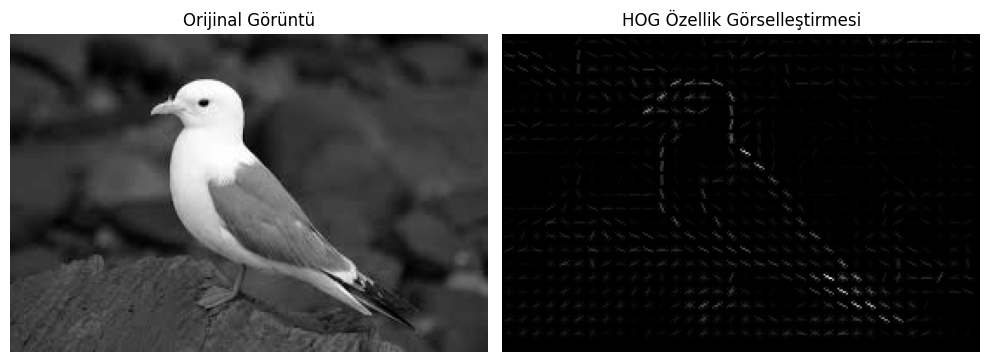

HOG Özellik Vektörü Uzunluğu: 24948


In [59]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import color

# 1. Görüntüyü yükle ve gri tona çevir
image = cv2.imread('Red_legged_Kittiwake.jpeg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. HOG özelliğini çıkar
hog_features, hog_image = hog(
    gray_image,
    orientations=9,       # Yön sayısı (açı bölmesi)
    pixels_per_cell=(8, 8),   # Her hücrenin boyutu
    cells_per_block=(2, 2),   # Blok başına hücre sayısı
    block_norm='L2-Hys',      # Normalizasyon yöntemi
    visualize=True,           # Görselleştirme çıktısı istersek True olmalı
    transform_sqrt=True       # Parlaklık farklarını normalize eder
)

# 3. Görselleştir
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Orijinal Görüntü")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("HOG Özellik Görselleştirmesi")
plt.imshow(hog_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# 4. Özellik vektörünü yazdır
print("HOG Özellik Vektörü Uzunluğu:", len(hog_features))


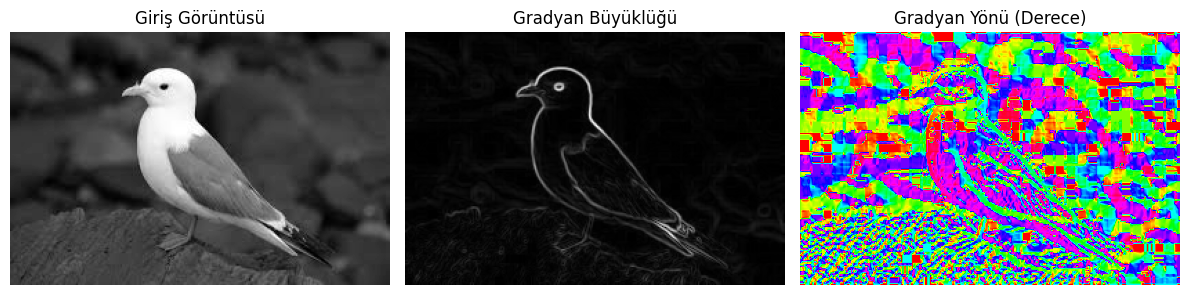

In [62]:
import cv2
import matplotlib.pyplot as plt

# 1. Görüntüyü yükle ve gri tona çevir
image = cv2.imread('Red_legged_Kittiwake.jpeg', cv2.IMREAD_GRAYSCALE)

# 2. X ve Y yönlerinde Sobel gradyanlarını hesapla
grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# 3. Gradyan büyüklüğü ve yönünü hesapla
magnitude = cv2.magnitude(grad_x, grad_y)
angle = cv2.phase(grad_x, grad_y, angleInDegrees=True)

# 4. Görselleştirme
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Giriş Görüntüsü')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Gradyan Büyüklüğü')
plt.imshow(magnitude, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gradyan Yönü (Derece)')
plt.imshow(angle, cmap='hsv')  # Açıları renkli görmek için HSV kullanılır
plt.axis('off')

plt.tight_layout()
plt.show()


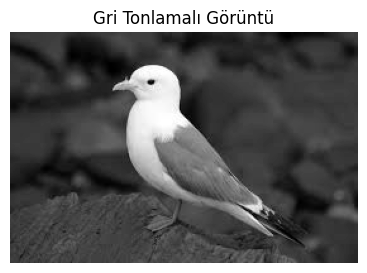

GLCM Özellikleri:
Kontrast        : 113.3450
Benzerlik       : 4.0549
Homojenlik      : 0.4234
Energy (Kare Kök ASM): 0.0457
ASM (Angular Second Moment): 0.0021
Korelasyon      : 0.9742


In [63]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

# 1. Görüntüyü yükle ve gri tona çevir
image = cv2.imread('Red_legged_Kittiwake.jpeg', cv2.IMREAD_GRAYSCALE)

# 2. GLCM oluştur (1 piksel mesafe, 0 derece yön)
glcm = graycomatrix(image,
                    distances=[1],
                    angles=[0],
                    levels=256,
                    symmetric=True,
                    normed=True)

# 3. GLCM özelliklerini hesapla
contrast     = graycoprops(glcm, 'contrast')[0, 0]
dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
homogeneity  = graycoprops(glcm, 'homogeneity')[0, 0]
energy       = graycoprops(glcm, 'energy')[0, 0]
ASM          = graycoprops(glcm, 'ASM')[0, 0]
correlation  = graycoprops(glcm, 'correlation')[0, 0]

# 4. Görselleştirme
plt.figure(figsize=(6, 3))
plt.title("Gri Tonlamalı Görüntü")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# 5. Sonuçları yazdır
print("GLCM Özellikleri:")
print(f"Kontrast        : {contrast:.4f}")
print(f"Benzerlik       : {dissimilarity:.4f}")
print(f"Homojenlik      : {homogeneity:.4f}")
print(f"Energy (Kare Kök ASM): {energy:.4f}")
print(f"ASM (Angular Second Moment): {ASM:.4f}")
print(f"Korelasyon      : {correlation:.4f}")


In [6]:
import SimpleITK as sitk
from radiomics import featureextractor

# Görüntü yolu ve dummy maske (her yer 1)
image_path = "Red_legged_Kittiwake.jpeg"
# Görüntüyü SimpleITK formatına çevir
image = sitk.ReadImage(image_path, sitk.sitkUInt8)
# Maske oluştur (görüntü boyutunda her piksel için 1)
mask = sitk.GetImageFromArray((sitk.GetArrayFromImage(image) > 0).astype('uint8'))

# Özellik çıkarıcıyı başlat
params = {
    'binWidth': 25,
    'resampledPixelSpacing': None,
    'interpolator': 'sitkBSpline',
    'verbose': True
}
extractor = featureextractor.RadiomicsFeatureExtractor(**params)
# Yalnızca GLRLM hesaplanacaksa:
extractor.enableAllFeatures()
extractor.disableAllFeatures()
extractor.enableFeatureClassByName('glrlm')
# Özellikleri çıkar
result = extractor.execute(image, mask)

# Sadece GLRLM özelliklerini yazdır
print("GLRLM Özellikleri:")
for key, val in result.items():
    if 'glrlm' in key:
        print(f"{key}: {val}")


GLRLM Özellikleri:
original_glrlm_GrayLevelNonUniformity: 743.0858591060901
original_glrlm_GrayLevelNonUniformityNormalized: 0.5159974604831794
original_glrlm_GrayLevelVariance: 0.24200126975841024
original_glrlm_HighGrayLevelRunEmphasis: 2.7635947556559723
original_glrlm_LongRunEmphasis: 4138.532051912091
original_glrlm_LongRunHighGrayLevelEmphasis: 16457.776663671564
original_glrlm_LongRunLowGrayLevelEmphasis: 1058.720898972223
original_glrlm_LowGrayLevelRunEmphasis: 0.5591013110860069
original_glrlm_RunEntropy: 6.441396354026036
original_glrlm_RunLengthNonUniformity: 53.46709753889485
original_glrlm_RunLengthNonUniformityNormalized: 0.036755176162022896
original_glrlm_RunPercentage: 0.028599713455645322
original_glrlm_RunVariance: 2718.997683599057
original_glrlm_ShortRunEmphasis: 0.16048286456494157
original_glrlm_ShortRunHighGrayLevelEmphasis: 0.2784848752368434
original_glrlm_ShortRunLowGrayLevelEmphasis: 0.1309823618969663


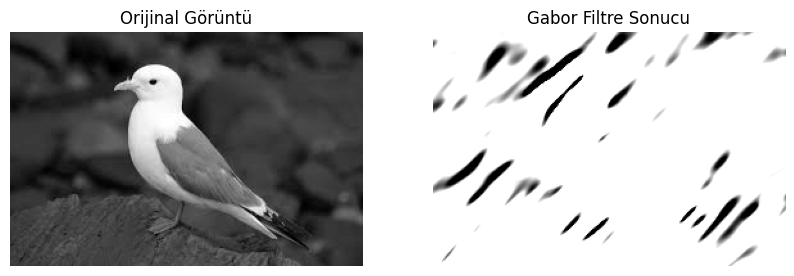

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Görüntüyü yükle (gri tonlamalı)
image = cv2.imread('Red_legged_Kittiwake.jpeg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Görüntü dosyası bulunamadı.")

# 2. Gabor filtresi parametreleri
ksize = 31        # Filtre boyutu (tek sayılı)
sigma = 4.0       # Gaussian zarfının standart sapması
theta = np.pi / 4 # Filtrenin yönü (radyan)
lambd = 10.0      # Dalga boyu
gamma = 0.5       # En/boy oranı (elongation)
psi = 0           # Faz ofseti

# 3. Gabor filtresi oluştur
gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)

# 4. Görüntüye Gabor filtresi uygula (convolve)
filtered_img = cv2.filter2D(image, cv2.CV_8UC3, gabor_kernel)

# 5. Görselleştirme
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Orijinal Görüntü")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Gabor Filtre Sonucu")
plt.imshow(filtered_img, cmap='gray')
plt.axis('off')

plt.show()


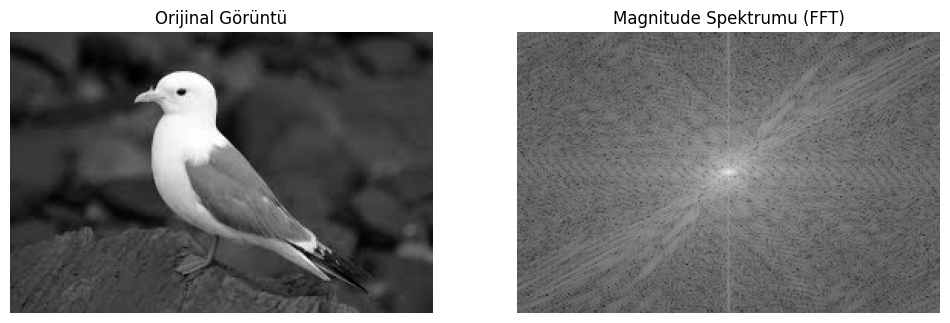

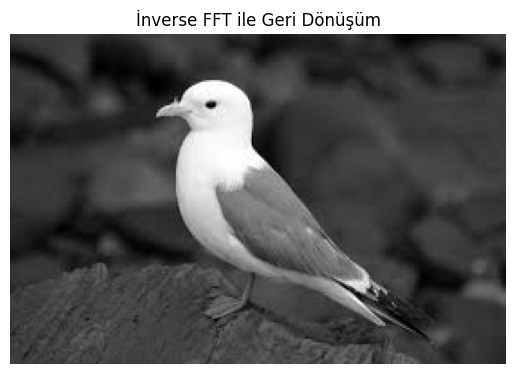

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Görüntüyü yükle ve gri tonlamaya çevir
image = cv2.imread('Red_legged_Kittiwake.jpeg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Görüntü dosyası bulunamadı.")

# 2. FFT uygula
f = np.fft.fft2(image)                # 2 boyutlu FFT
fshift = np.fft.fftshift(f)           # Frekans bileşenlerini merkeze taşı

# 3. Spektrumu hesapla (genlik)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # +1 sayısal hata önleme

# 4. Görselleştir
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Orijinal Görüntü')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Magnitude Spektrumu (FFT)')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.show()

#İstenirse ters dönüşüm (Inverse FFT) da yapılabilir:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.imshow(img_back, cmap='gray')
plt.title('İnverse FFT ile Geri Dönüşüm')
plt.axis('off')
plt.show()


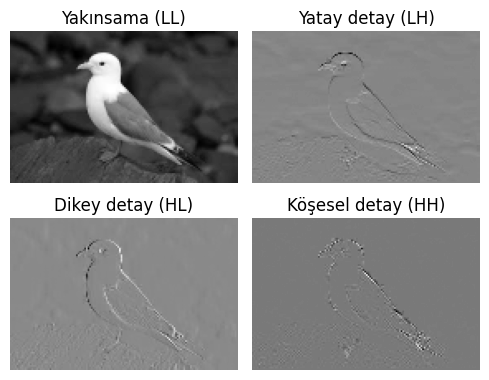

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt  # PyWavelets kütüphanesi

# 1. Görüntüyü yükle ve gri tonlamaya çevir
image = cv2.imread('Red_legged_Kittiwake.jpeg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Görüntü dosyası bulunamadı.")

# 2. DWT uygula (tek seviyeli)
coeffs2 = pywt.dwt2(image, 'haar')  # 'haar', Daubechies ailesinin en basit dalgaleti
LL, (LH, HL, HH) = coeffs2  # Alt bantlar

# 3. Görselleştir
titles = ['Yakınsama (LL)', 'Yatay detay (LH)', 'Dikey detay (HL)', 'Köşesel detay (HH)']
images = [LL, LH, HL, HH]

plt.figure(figsize=(5, 4))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
